In [8]:
%matplotlib inline
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib as mpl
import matplotlib.pyplot as plt


df = pd.read_excel("Canada.xlsx", sheet_name='Canada by Citizenship', skiprows = range(20), skipfooter = 2)
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [9]:
print(df.shape)

(195, 43)


In [10]:
""" Clean up data"""

# remove unnecessary columns
df.drop(['AREA', 'REG','DEV','Type', 'Coverage'], axis = 1, inplace = True)

# let's rename the columns so that they make sense
df.rename(columns = {'OdName':'Country', 'AreaName': 'Continent', 'RegName':'Region'}, inplace = True)

# make all column labels of type string
df.columns = list(map(str, df.columns))

# set the country name as index
df.set_index('Country', inplace = True)

# add total column
df['Total'] = df.sum(axis = 1)

# years for plotting later on
years = list(map(str, range(1980, 2014)))

print('Data dimensions: ', df.shape)

Data dimensions:  (195, 38)


In [12]:
""" World Clouds"""
!conda install -c conda-forge wordcloud --yes
from wordcloud import WordCloud, STOPWORDS

print('Wordcloud is installed and imported')

Solving environment: done

## Package Plan ##

  environment location: /home/kalilinux/anaconda3

  added / updated specs:
    - wordcloud


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.9.2                |   py38h578d9bd_0         3.0 MB  conda-forge
    python_abi-3.8             |           1_cp38           4 KB  conda-forge
    wordcloud-1.8.1            |   py38h25fe258_1         184 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.2 MB

The following NEW packages will be INSTALLED:

  python_abi         conda-forge/linux-64::python_abi-3.8-1_cp38
  wordcloud          conda-forge/linux-64::wordcloud-1.8.1-py38h25fe258_1

The following packages will be SUPERSEDED by a higher-priority channel:

  conda               pkgs/main::conda-4.9.2-py38h06a4308_0 --> conda-forge::conda-4.9.2-p

In [13]:
# open the file and read it

aid_text = open('aid.txt', 'r').read()


In [19]:
# use the stopwords to remove any redundant stopwords
stopwords = set(STOPWORDS)

# instantiate a word cloud object

aid_wc = WordCloud(background_color = 'white', max_words = 1500, stopwords = stopwords)

# generate the word cloud
aid_wc.generate(aid_text)


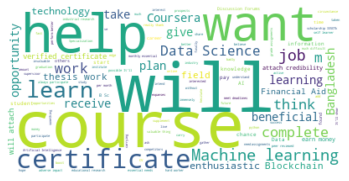

In [20]:
# display the word cloud
plt.imshow(aid_wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

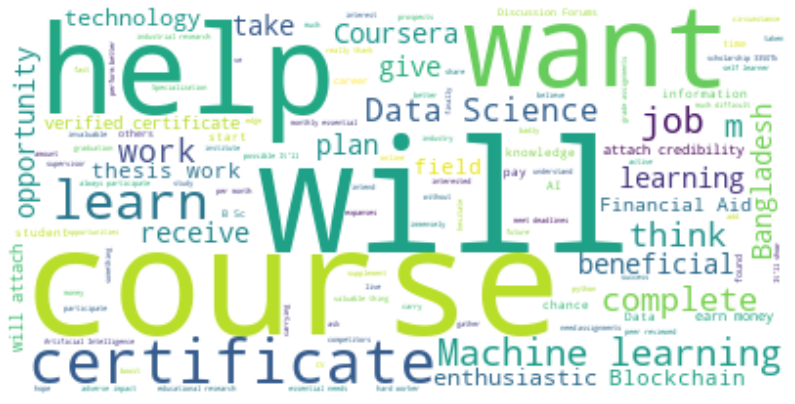

In [21]:
# let's resize the cloud so that we can see the less frequent words a little better
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

# display the cloud
plt.imshow(aid_wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

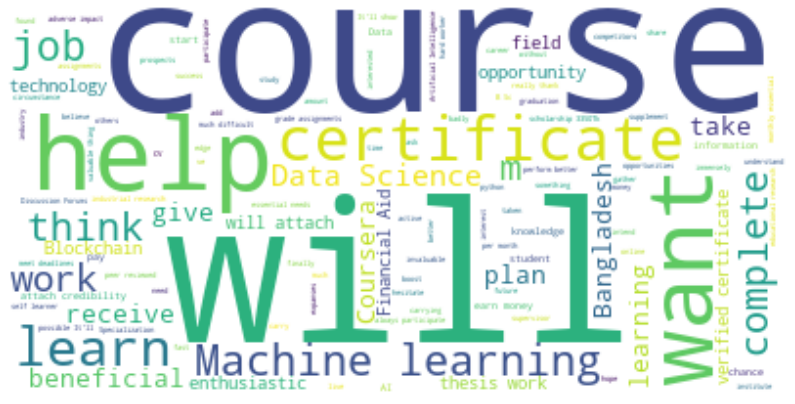

In [18]:
stopwords.add('Raju') #add the words said to stopwords

# re-generate the word cloud 
aid_wc.generate (aid_text)

# display the cloud
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(aid_wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

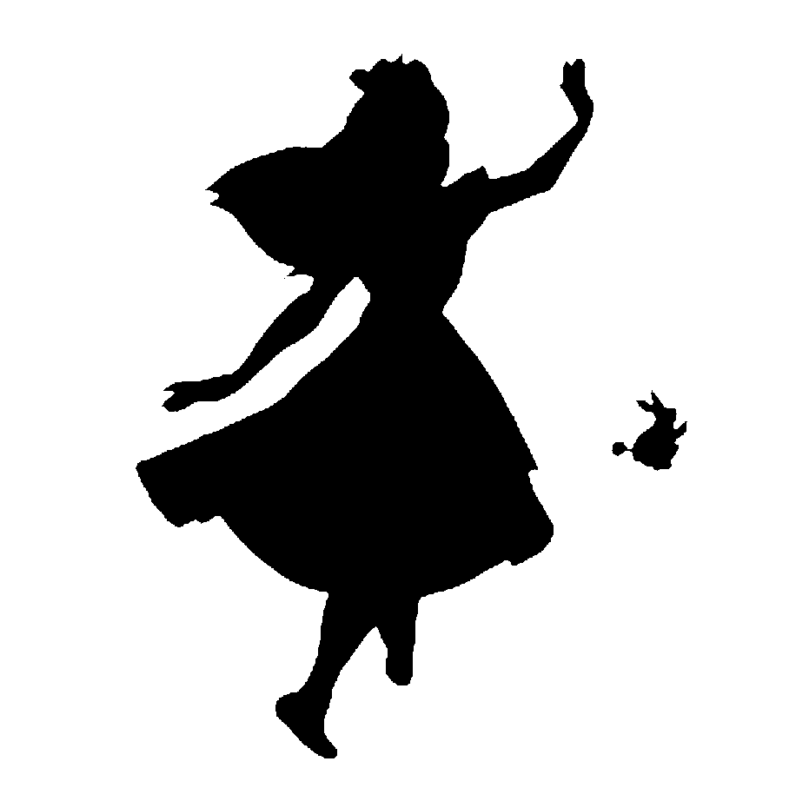

In [22]:
# save mask to aid_mask
aid_mask = np.array(Image.open('aid_mask.png'))

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(aid_mask, cmap = plt.cm.gray, interpolation = 'bilinear')
plt.axis('off')
plt.show()

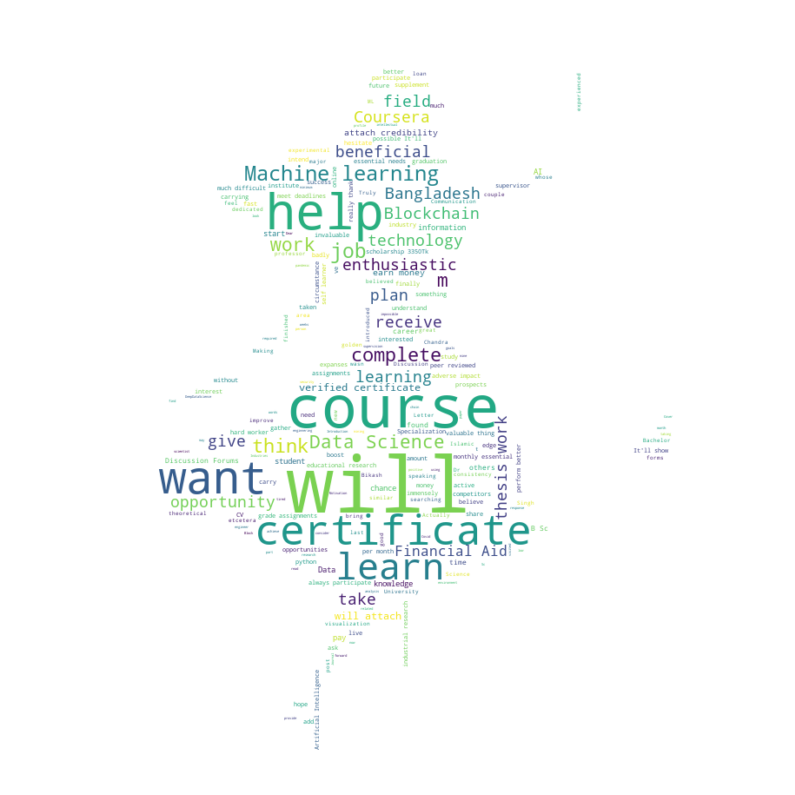

In [23]:
# instantiate a word cloud object
aid_wc = WordCloud(background_color='white', max_words=2000, mask=aid_mask, stopwords=stopwords)

# generate the word cloud
aid_wc.generate(aid_text)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(aid_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [24]:
"""now we will try to apply in our data set"""
total_immigration = df['Total'].sum()
total_immigration

6409153

In [27]:
max_words = 90
word_string = ''
for country in df.index.values:
    # check if country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df.loc[country, 'Total']/float(total_immigration)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
                                     
# display the generated text
word_string

'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania '

In [28]:
# create the word colud
wordcloud = WordCloud(background_color = 'white').generate(word_string)


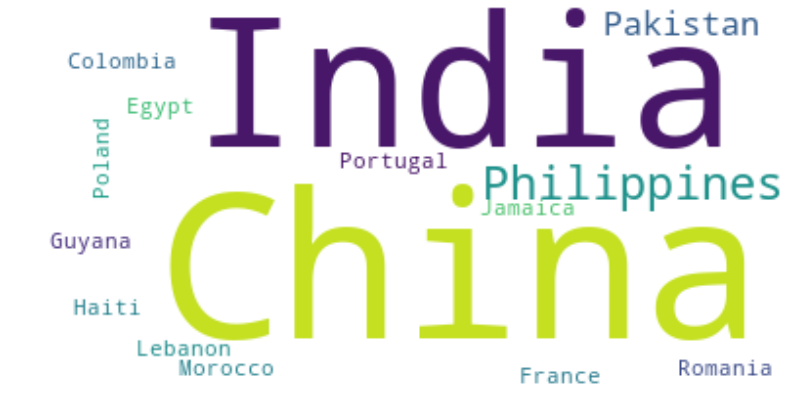

In [29]:
# display the cloud
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()


In [30]:
""" Regression plots using seaborn """
import seaborn as sns

In [31]:
"""Create a new dataframe that stores that total number of landed immigrants to Canada per year from 1980 to 2013"""

# we use sum() to get the total population per year
df_tot = pd.DataFrame(df[years].sum(axis = 0))

# change the years to type float
df_tot.index = map(float, df_tot.index)

# reset the index to put in back in as a column in the DF
df_tot.reset_index(inplace = True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


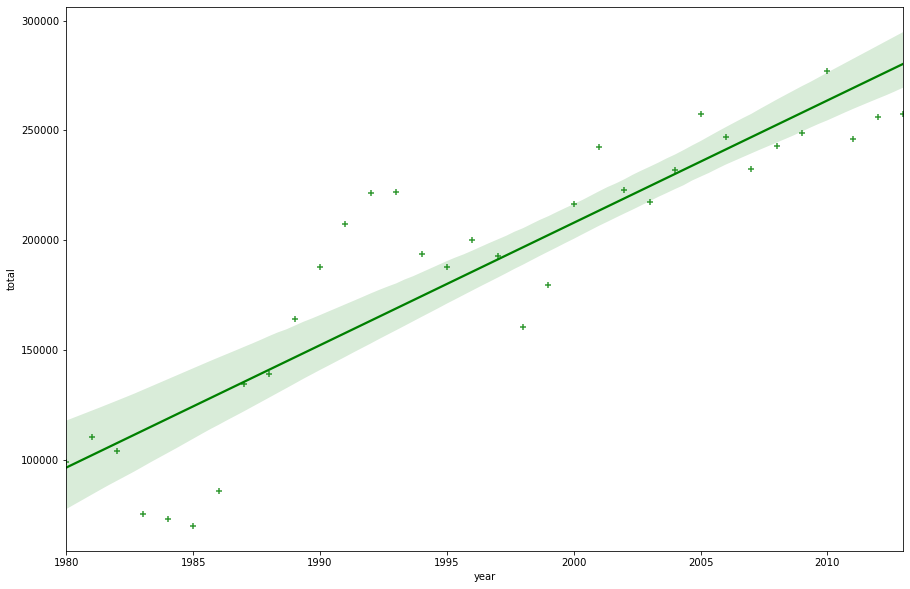

In [35]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x = 'year', y ='total', data = df_tot, color ='green', marker = '+')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

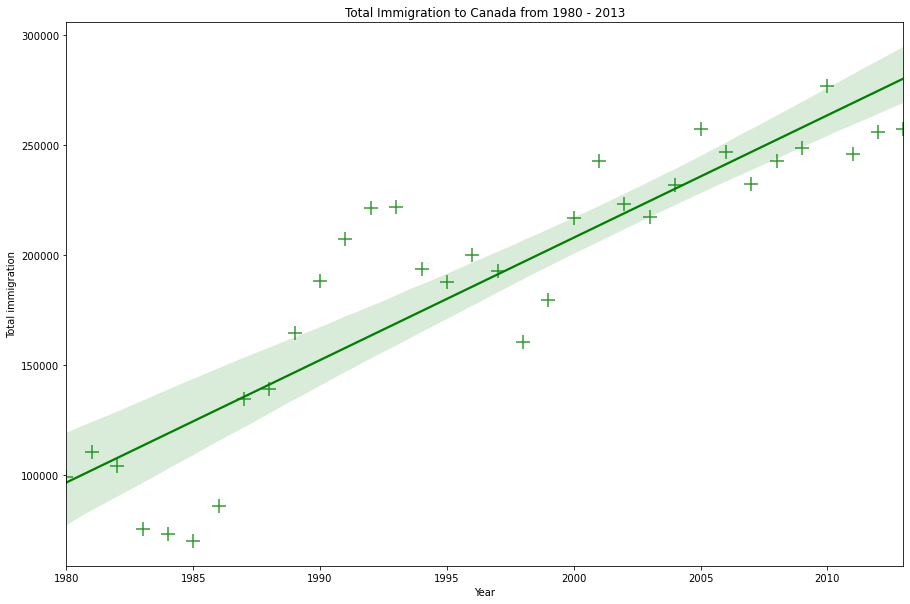

In [36]:
# increase the size of markear scatter_kws = {'s': 200}
plt.figure(figsize=(15, 10))
ax = sns.regplot(x = 'year', y ='total', data = df_tot, color ='green', marker = '+', scatter_kws = {'s': 200})

ax.set(xlabel = 'Year', ylabel = 'Total immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')


Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

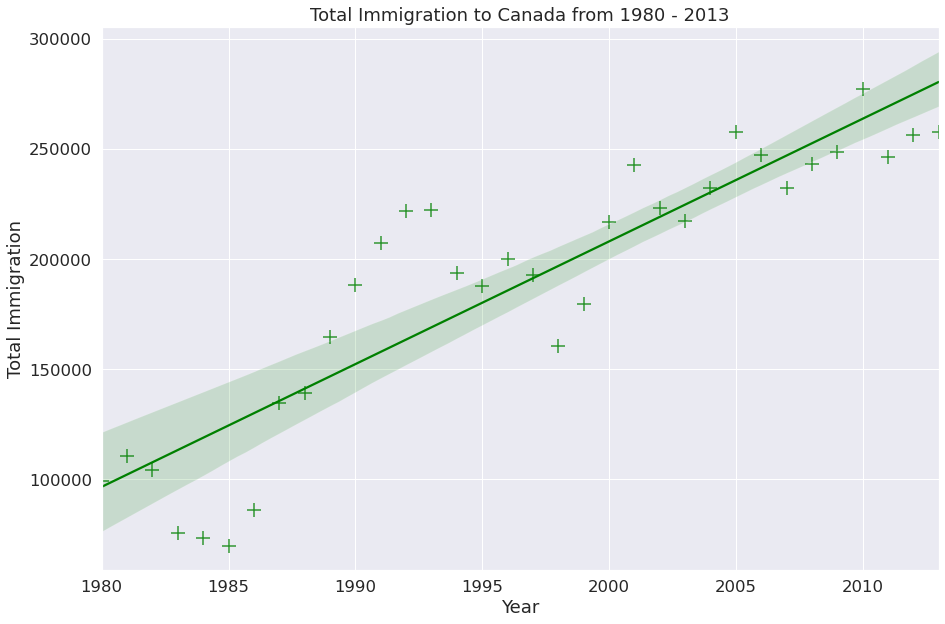

In [37]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5) # increase the size of font

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

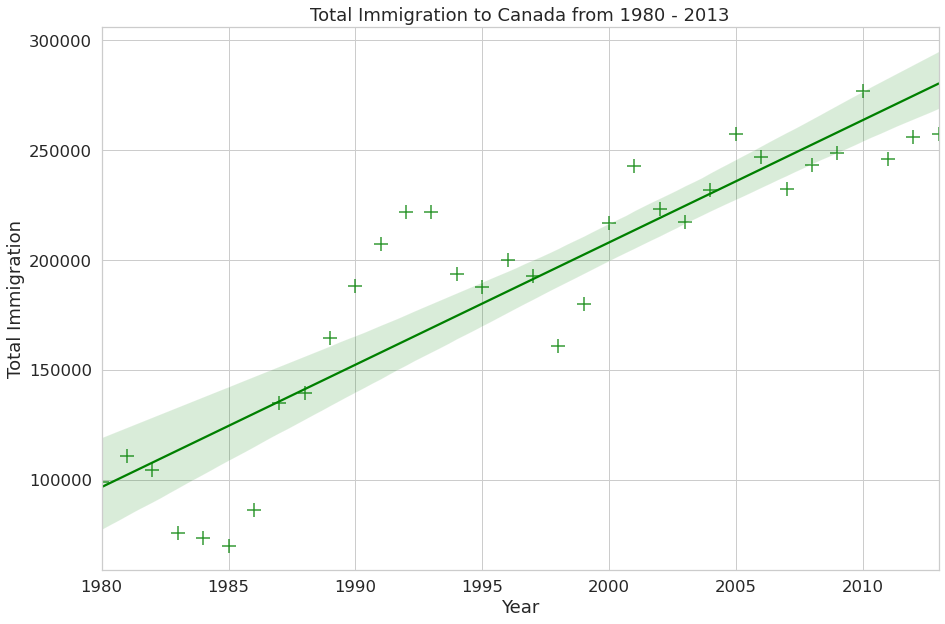

In [39]:
# a complete scatter plot with regression
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid') # change background to white background 'whitegrid', 'ticks'

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Text(0.5, 1.0, 'Total Immigrationn from Denmark, Sweden, and Norway to Canada from 1980 - 2013')

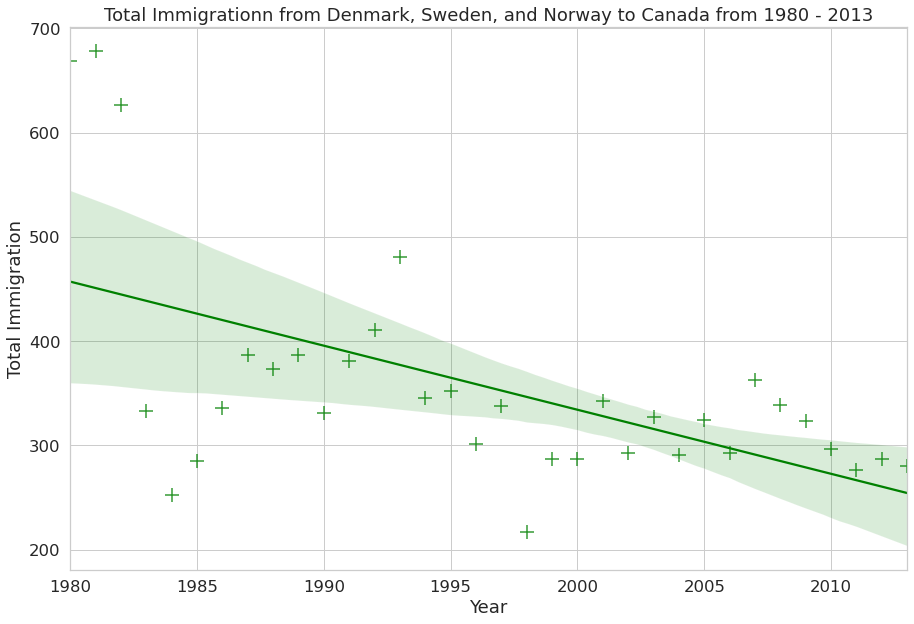

In [41]:
""" Use seaborn to create a scatter plot with a regression line to visualize the total immigration from Denmark, Sweden, and Norway to Canada from 1980 to 2013."""
# create df_countries dataframe
df_countries = df.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()

# create df_total by summing across three countries for each year
df_total = pd.DataFrame(df_countries.sum(axis=1))

# reset index in place
df_total.reset_index(inplace=True)

# rename columns
df_total.columns = ['year', 'total']

# change column year from string to int to create scatter plot
df_total['year'] = df_total['year'].astype(int)

# define figure size
plt.figure(figsize=(15, 10))

# define background style and font size
sns.set(font_scale=1.5)
sns.set_style('whitegrid')

# generate plot and add title and axes labels
ax = sns.regplot(x='year', y='total', data=df_total, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigrationn from Denmark, Sweden, and Norway to Canada from 1980 - 2013')
